# Positions and Overtakes

## Import libraries

In [4]:
import fastf1
import matplotlib.pyplot as plt
import pandas as pd
# from telemetry_utils import *

## Positions

In [6]:
results_df = pd.read_csv('data/gps_2024_season_results.csv')
results_df = results_df[['Abbreviation', 'ClassifiedPosition', 'GridPosition', 'Status', 'EventName']]
results_df = results_df.rename(columns={'Abbreviation': 'Driver'})
results_df.head()

,Driver,ClassifiedPosition,GridPosition,Status,EventName
0,VER,1,1.0,Finished,Bahrain Grand Prix
1,PER,2,5.0,Finished,Bahrain Grand Prix
2,SAI,3,4.0,Finished,Bahrain Grand Prix
3,LEC,4,2.0,Finished,Bahrain Grand Prix
4,RUS,5,3.0,Finished,Bahrain Grand Prix


### Positions gained

In [17]:
pos_gain_df = results_df.copy()
pos_gain_df.head()

,Driver,ClassifiedPosition,GridPosition,Status,EventName
0,VER,1,1.0,Finished,Bahrain Grand Prix
1,PER,2,5.0,Finished,Bahrain Grand Prix
2,SAI,3,4.0,Finished,Bahrain Grand Prix
3,LEC,4,2.0,Finished,Bahrain Grand Prix
4,RUS,5,3.0,Finished,Bahrain Grand Prix


In [18]:
def calculate_positions(row):
    try:
        # Try converting the value to a float
        classified_position = float(row['ClassifiedPosition'])
        return row['GridPosition'] - classified_position
    except ValueError:
        # If conversion fails, return the original value
        return row['ClassifiedPosition']

In [19]:
# Apply the function row-wise
pos_gain_df['GainedPositions'] = pos_gain_df.apply(calculate_positions, axis=1)

In [20]:
pos_gain_df.sample(5)

,Driver,ClassifiedPosition,GridPosition,Status,EventName,GainedPositions
333,OCO,15,0.0,+1 Lap,Azerbaijan Grand Prix,-15.0
109,HUL,11,9.0,Finished,Miami Grand Prix,-2.0
256,OCO,18,19.0,+1 Lap,Hungarian Grand Prix,1.0
10,ZHO,11,17.0,+1 Lap,Bahrain Grand Prix,6.0
275,SAR,17,18.0,Finished,Belgian Grand Prix,1.0


Input function for specific driver and grand prix and return gained positions. Might also have to define more what the R, W, D mean and what the program should output when finding those.

### Positions during the race

In [22]:
pos_df = pd.read_csv("data/gps_2024_season_laps.csv")
pos_df = pos_df[['Driver', 'LapNumber', 'Stint', 'Position', 'EventName']]
pos_df.head()

,Driver,LapNumber,Stint,Position,EventName
0,VER,1.0,1.0,1.0,Bahrain Grand Prix
1,VER,2.0,1.0,1.0,Bahrain Grand Prix
2,VER,3.0,1.0,1.0,Bahrain Grand Prix
3,VER,4.0,1.0,1.0,Bahrain Grand Prix
4,VER,5.0,1.0,1.0,Bahrain Grand Prix


In [23]:
# pos_df[(pos_df['Driver'] == 'BOT') & (pos_df['EventName'] == 'Bahrain Grand Prix')]

In [28]:
event = 'Bahrain Grand Prix'
pos_df = pos_df[pos_df['EventName'] == event]

In [29]:
# pos_df = pos_df[pos_df['Driver'] == 'VER']
# pos_df.head()

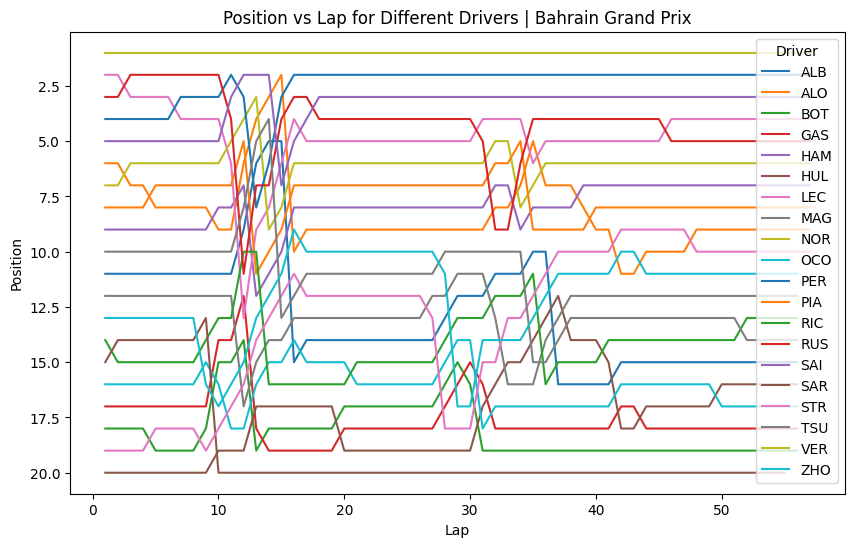

In [30]:
# import matplotlib.pyplot as plt

# Create a matplotlib figure
fig, ax = plt.subplots(figsize=(10, 6))

# Group by 'Driver' and plot each driver's data
for driver, data in pos_df.groupby('Driver'):
    ax.plot(data['LapNumber'], data['Position'], label=driver)

# Adding labels and legend
ax.set_xlabel('Lap')
ax.set_ylabel('Position')
ax.set_title(f'Position vs Lap for Different Drivers | {event}')
ax.legend(title='Driver')
ax.invert_yaxis()  # Optional: Reverse y-axis so 1st position is at the top

Could add another column for team for easier plot-information retrieval

Also add specific colors depending on driver-team (e.g. dark blue and blue for red bull)

### Driver lead throughout race

In [ ]:
pos_df = pd.read_csv("data/gps_2024_season_laps.csv")
pos_df = pos_df[['Driver', 'LapNumber', 'Stint', 'Position', 'EventName']]
pos_df.head()

,Driver,LapNumber,Stint,Position,EventName
1177,VER,1.0,1.0,1.0,Bahrain Grand Prix
1178,VER,2.0,1.0,1.0,Bahrain Grand Prix
1179,VER,3.0,1.0,1.0,Bahrain Grand Prix
1180,VER,4.0,1.0,1.0,Bahrain Grand Prix
1181,VER,5.0,1.0,1.0,Bahrain Grand Prix


In [ ]:
event = 'Dutch Grand Prix'
pos_df = pos_df[pos_df['EventName'] == event]

In [100]:
# pd.DataFrame(pos_df[['Position', 'Driver']].value_counts())

In [101]:
lead_df = pd.DataFrame(pos_df[pos_df['Position'] == 1]['Driver'].value_counts())

In [102]:
lead_df

,count
Driver,
NOR,51
VER,17
PIA,4


In [ ]:
# Assuming your DataFrame is named df
max_driver = lead_df['count'].idxmax()

# Print the result
print(f"Driver who lead the race the most: {max_driver}")

Driver with the maximum count: NOR


Could make it more informative (e.g. pie chart for amount of laps led??)

Could also extend for season-multiple grand pri

## Overtakes

In [7]:
# # Here is the distinction if we want for one race otherwise for the whole season
# pos_df = pos_df[pos_df['EventName'] == 'Dutch Grand Prix']

In [16]:
over_df = pd.DataFrame()

events = pos_df['EventName'].unique()
drivers = pos_df['Driver'].unique()

over_df['Driver'] = drivers
over_df[events] = 0

In [17]:
over_df.head()

,Driver,Bahrain Grand Prix,Saudi Arabian Grand Prix,Australian Grand Prix,Japanese Grand Prix,Chinese Grand Prix,Miami Grand Prix,Emilia Romagna Grand Prix,Monaco Grand Prix,Canadian Grand Prix,...,British Grand Prix,Hungarian Grand Prix,Belgian Grand Prix,Dutch Grand Prix,Italian Grand Prix,Azerbaijan Grand Prix,Singapore Grand Prix,United States Grand Prix,Mexico City Grand Prix,São Paulo Grand Prix
0,VER,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PER,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,SAI,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,LEC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,RUS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Driver overtakes

In [18]:
# Iterate over the DataFrame grouped by each driver
for event in events:
    event_pos_df = pos_df[pos_df['EventName'] == event]

    for driver, group in event_pos_df.groupby('Driver'):
        # Sort by 'LapNumber' to ensure proper order
        group = group.sort_values(by='LapNumber')
        
        # Calculate when an overtake happens (position decrease)
        event_pos_df.loc[group.index, event] = (group['Position'].shift(1) > group['Position']).astype(int)

    # To find the total number of overtakes by each driver
    overtakes_per_driver = event_pos_df.groupby('Driver')[event].sum()

    # Add the new event column to over_df with values mapped from overtakes_per_driver
    over_df[event] = over_df['Driver'].map(overtakes_per_driver)

    # Replace any NaN values with 0 (if a driver doesn't appear in overtakes_per_driver)
    over_df[event] = over_df[event].fillna(0).astype(int)

/var/folders/9c/9pfxvdg55z52zckw2xcljktm0000gn/T/ipykernel_3268/3729388877.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_pos_df.loc[group.index, event] = (group['Position'].shift(1) > group['Position']).astype(int)
/var/folders/9c/9pfxvdg55z52zckw2xcljktm0000gn/T/ipykernel_3268/3729388877.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_pos_df.loc[group.index, event] = (group['Position'].shift(1) > group['Position']).astype(int)
/var/folders/9c/9pfxvdg55z52zckw2xcljktm0000gn/T/ipykern

In [19]:
over_df.head()

,Driver,Bahrain Grand Prix,Saudi Arabian Grand Prix,Australian Grand Prix,Japanese Grand Prix,Chinese Grand Prix,Miami Grand Prix,Emilia Romagna Grand Prix,Monaco Grand Prix,Canadian Grand Prix,...,British Grand Prix,Hungarian Grand Prix,Belgian Grand Prix,Dutch Grand Prix,Italian Grand Prix,Azerbaijan Grand Prix,Singapore Grand Prix,United States Grand Prix,Mexico City Grand Prix,São Paulo Grand Prix
0,VER,0,1,0,2,2,1,3,1,3,...,5,7,9,3,7,5,1,2,8,9
1,PER,5,3,10,8,6,4,9,0,8,...,8,14,3,6,9,3,4,6,6,8
2,SAI,5,0,1,10,8,3,3,1,9,...,4,9,8,9,7,5,9,3,2,6
3,LEC,7,2,7,9,5,2,3,0,2,...,5,7,7,5,5,1,6,2,2,7
4,RUS,6,3,8,14,6,7,4,1,4,...,2,11,8,4,13,7,4,14,5,2


In [20]:
over_df['DriverTotalOvertakes'] = over_df[over_df.columns[1:]].sum(axis=1)

In [22]:
over_df.tail()

,Driver,Bahrain Grand Prix,Saudi Arabian Grand Prix,Australian Grand Prix,Japanese Grand Prix,Chinese Grand Prix,Miami Grand Prix,Emilia Romagna Grand Prix,Monaco Grand Prix,Canadian Grand Prix,...,Hungarian Grand Prix,Belgian Grand Prix,Dutch Grand Prix,Italian Grand Prix,Azerbaijan Grand Prix,Singapore Grand Prix,United States Grand Prix,Mexico City Grand Prix,São Paulo Grand Prix,DriverTotalOvertakes
18,BOT,7,2,8,10,5,5,6,5,7,...,11,11,5,10,5,8,7,11,7,157
19,SAR,2,3,0,9,12,2,8,4,1,...,10,7,6,0,0,0,0,0,0,81
20,BEA,0,7,0,0,0,0,0,0,0,...,0,0,0,0,8,0,0,0,12,27
21,COL,0,0,0,0,0,0,0,0,0,...,0,0,0,10,7,5,10,11,2,45
22,LAW,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,10,12,5,27


In [23]:
over_df[over_df.columns[1:]].sum(axis=0)

Bahrain Grand Prix            153
Saudi Arabian Grand Prix       51
Australian Grand Prix         145
Japanese Grand Prix           136
Chinese Grand Prix            185
Miami Grand Prix              107
Emilia Romagna Grand Prix     116
Monaco Grand Prix              30
Canadian Grand Prix           119
Spanish Grand Prix            204
Austrian Grand Prix           171
British Grand Prix             96
Hungarian Grand Prix          183
Belgian Grand Prix            171
Dutch Grand Prix              129
Italian Grand Prix            164
Azerbaijan Grand Prix         116
Singapore Grand Prix          114
United States Grand Prix      132
Mexico City Grand Prix        134
São Paulo Grand Prix           98
DriverTotalOvertakes         2754
dtype: int64

Input for function for specific driver/grand prix and output what needed